## Import libraries and declare functions

In [1]:
# as an general case we will use the classes from ieee.core file. So we don't need to import a lot of libraries. Only the ones for EDA.
from scipy import stats

import ieee.core as core

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

PATH_TO_DATA = 'data'
PATH_TO_MODELS = 'optimization'
PATH_TO_RESULTS = 'results'

# Preliminary EDA

## Load initial data for analysis

In [2]:
%%time
DS0_class = core.PrepareDataset(PATH_TO_DATA)
print(DS0_class.initial_df.shape)
DS0_class.initial_df.head()

(38661, 425)
Wall time: 4.17 s


## Collapse basic indicators to 6-month period

In [3]:
%%time
DS0_class.collapse_basic_indicators()
DS0_class.transformed_df.head()

Begin to collapse basic indicators
range(1, 71) indicators were selected
Basic indicators collapsed
Wall time: 21.3 s


## Check target distribution


 mu = 0.00 and sigma = 1.00



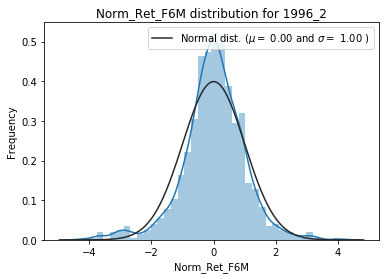

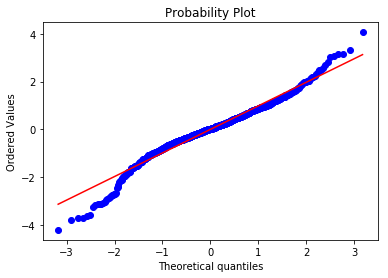


 mu = 0.00 and sigma = 1.00



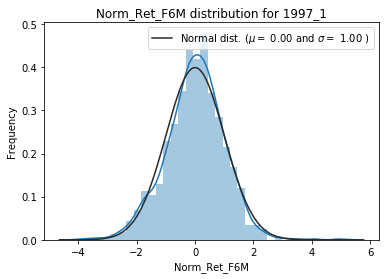

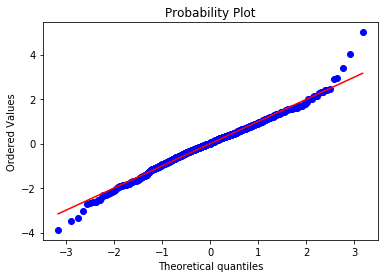


 mu = -0.00 and sigma = 1.00



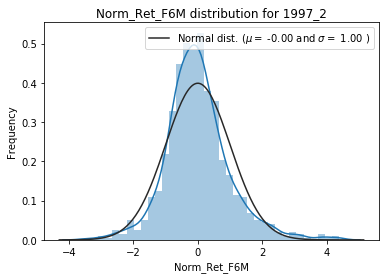

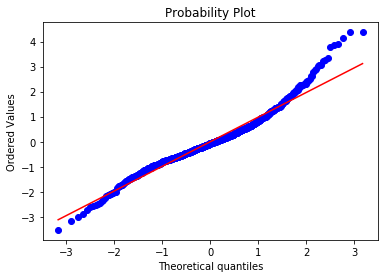


 mu = -0.00 and sigma = 1.00



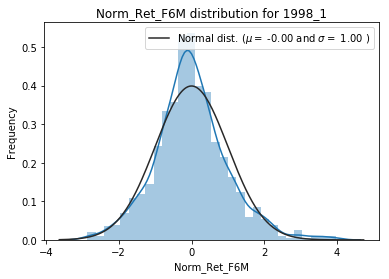

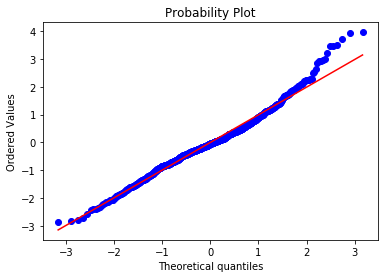


 mu = -0.00 and sigma = 1.00



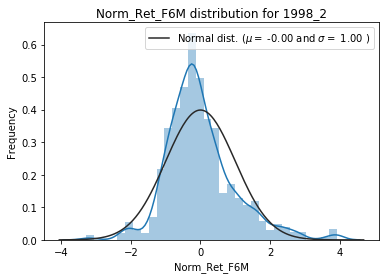

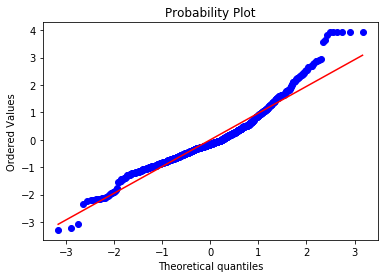


 mu = 0.00 and sigma = 1.00



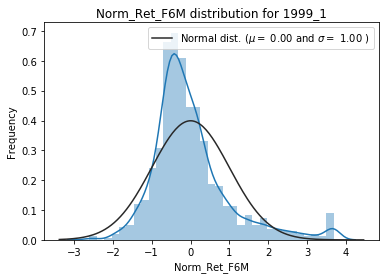

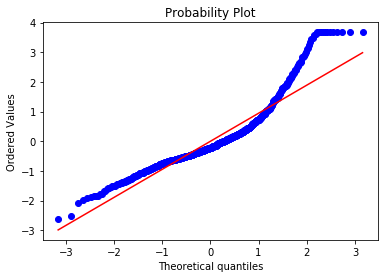


 mu = -0.00 and sigma = 1.00



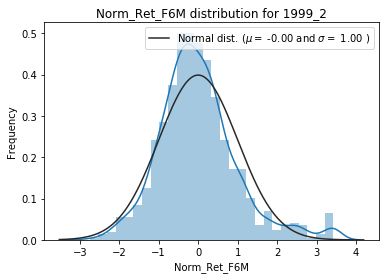

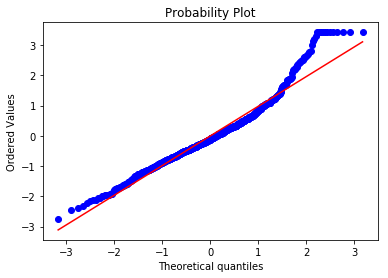


 mu = 0.00 and sigma = 1.00



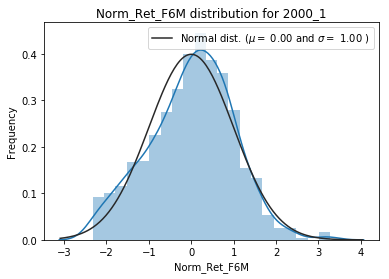

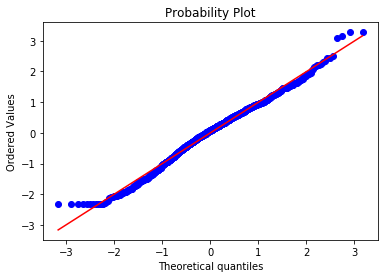


 mu = -0.00 and sigma = 1.00



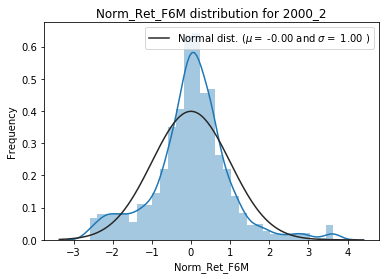

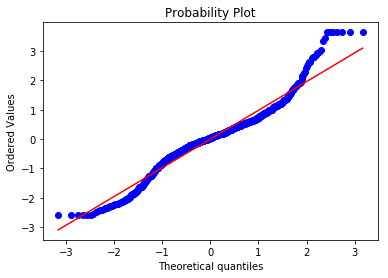


 mu = -0.00 and sigma = 1.00



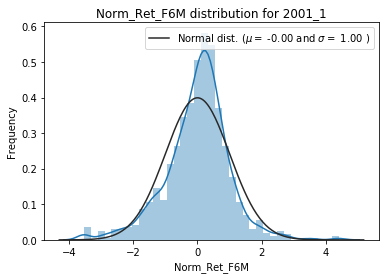

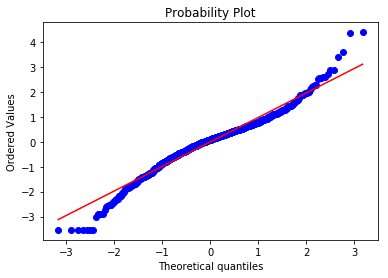


 mu = 0.00 and sigma = 1.00



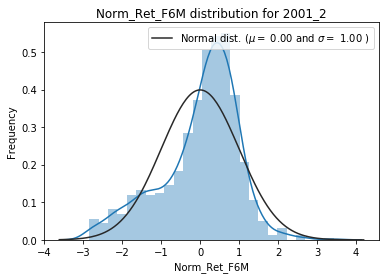

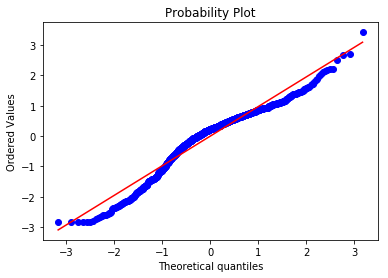


 mu = -0.00 and sigma = 0.99



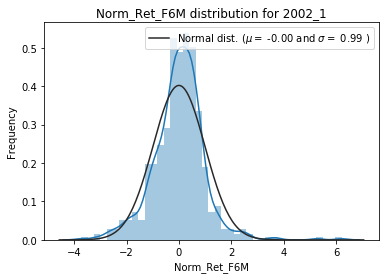

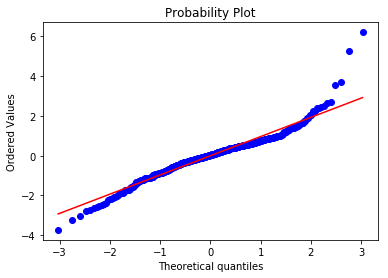


 mu = 0.02 and sigma = 0.99



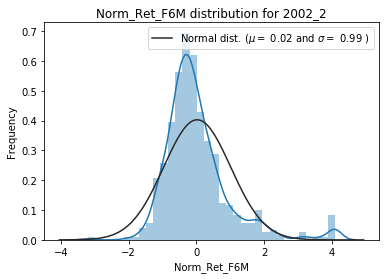

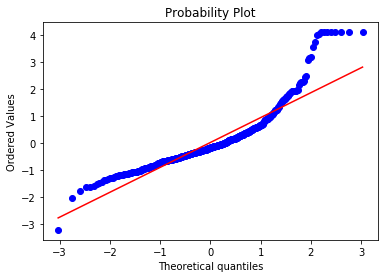


 mu = -0.04 and sigma = 0.93



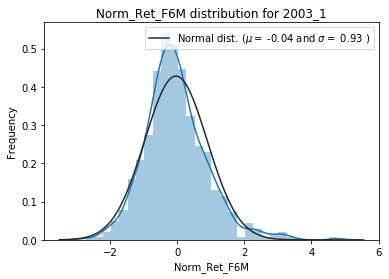

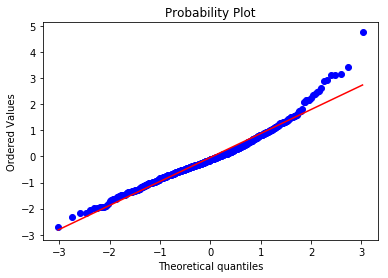


 mu = -0.04 and sigma = 0.97



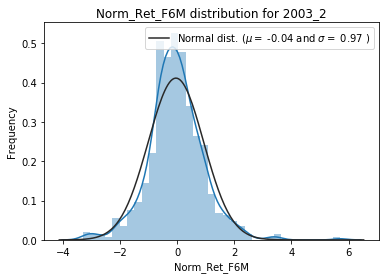

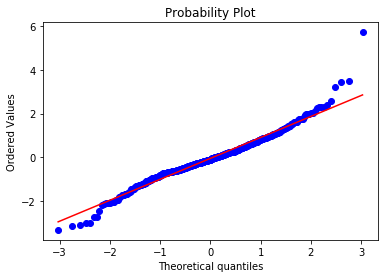


 mu = -0.01 and sigma = 0.98



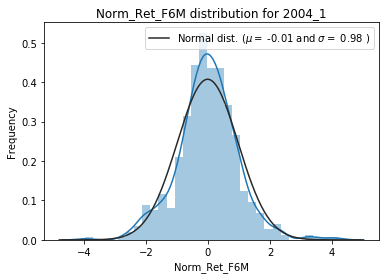

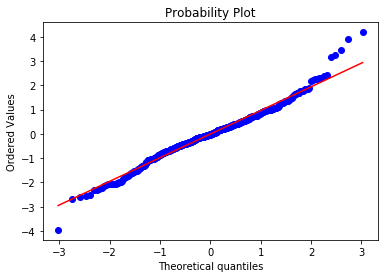


 mu = -0.01 and sigma = 0.99



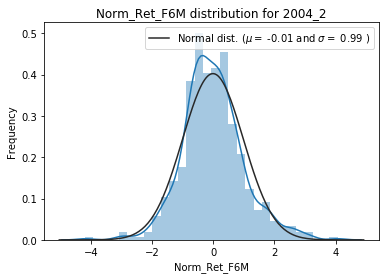

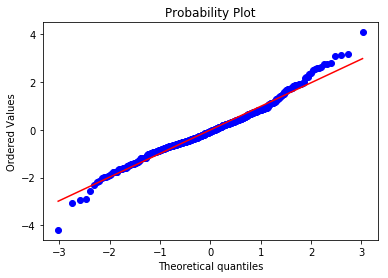


 mu = -0.02 and sigma = 1.00



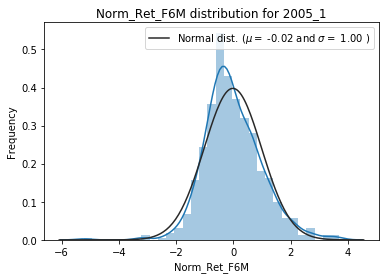

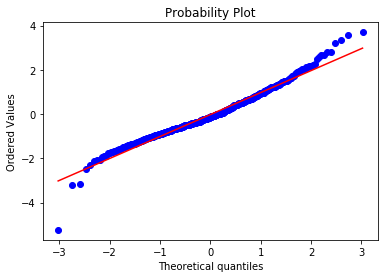


 mu = -0.01 and sigma = 1.03



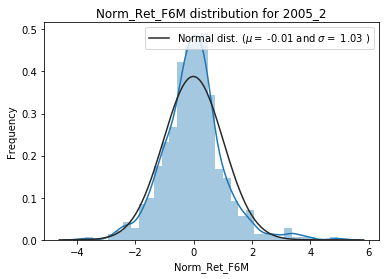

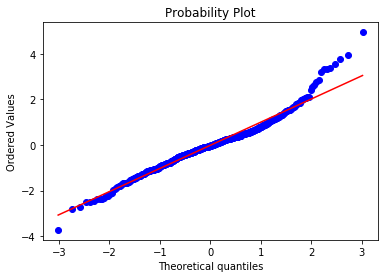


 mu = -0.02 and sigma = 0.99



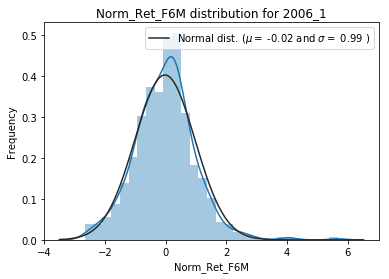

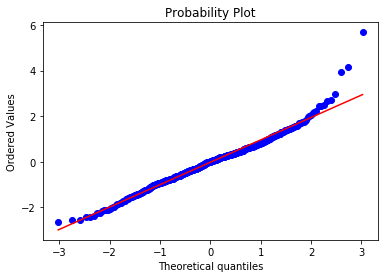


 mu = 0.00 and sigma = 1.00



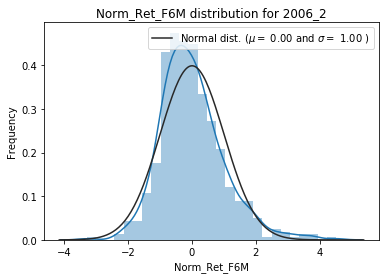

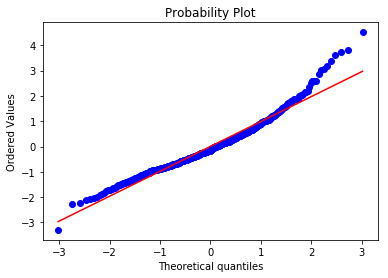


 mu = -0.04 and sigma = 0.97



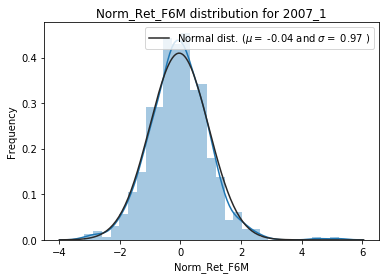

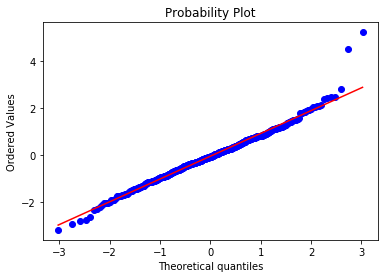


 mu = 0.01 and sigma = 0.98



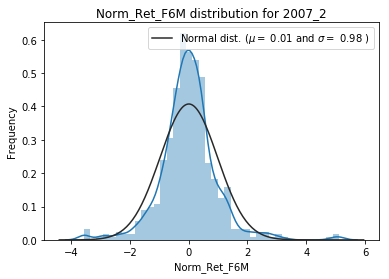

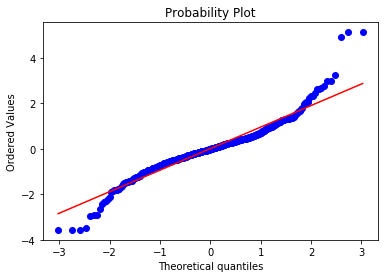


 mu = -0.01 and sigma = 1.02



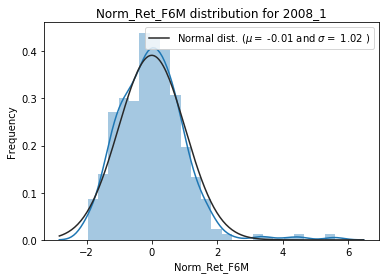

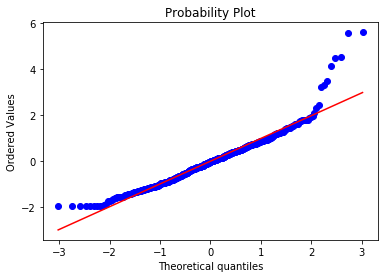


 mu = -0.01 and sigma = 1.01



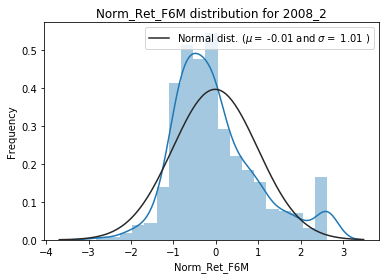

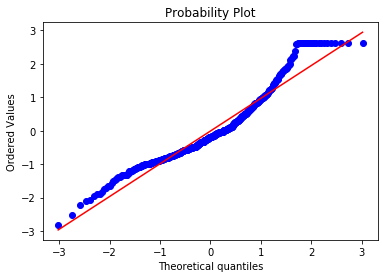


 mu = 0.02 and sigma = 1.02



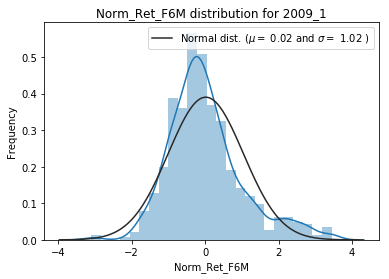

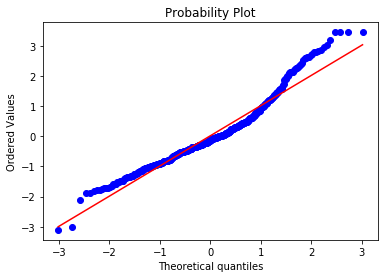


 mu = -0.04 and sigma = 0.98



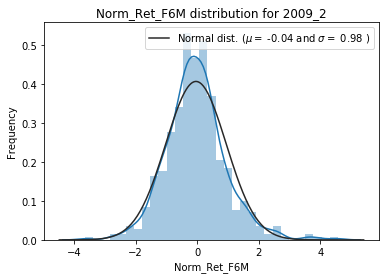

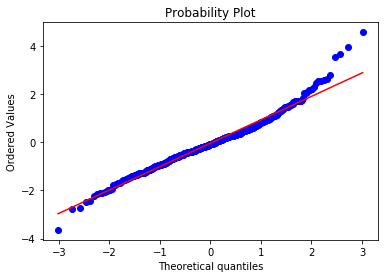


 mu = -0.01 and sigma = 1.01



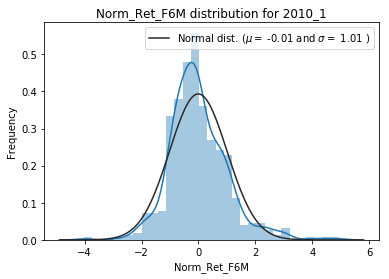

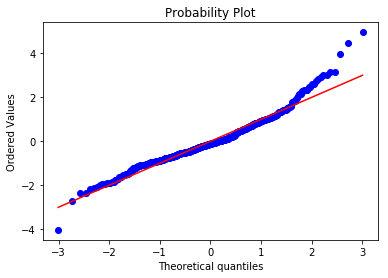


 mu = 0.01 and sigma = 1.01



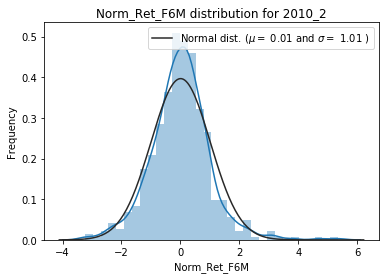

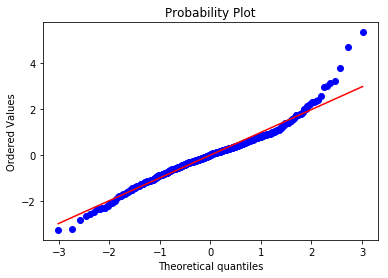


 mu = 0.00 and sigma = 1.01



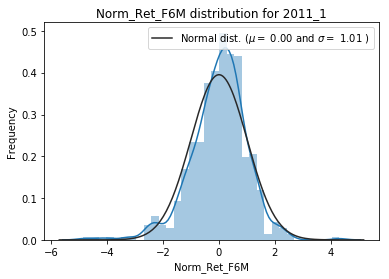

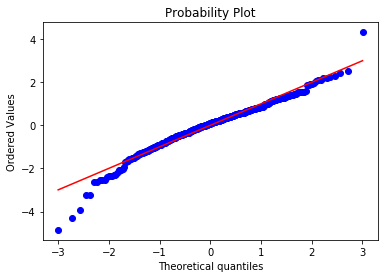


 mu = 0.01 and sigma = 1.01



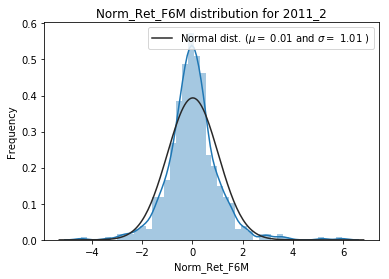

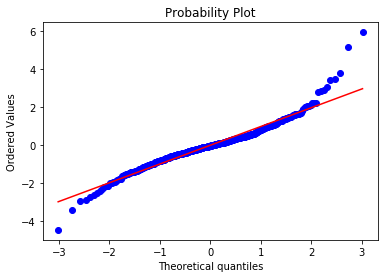


 mu = -0.03 and sigma = 1.00



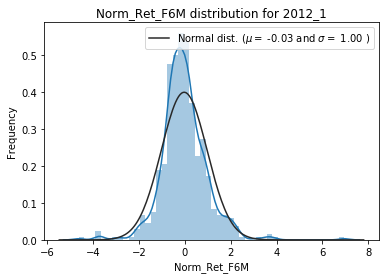

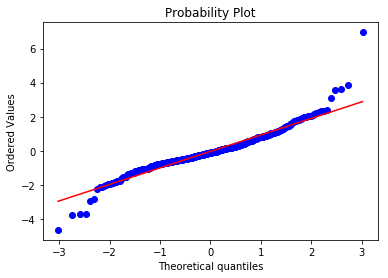


 mu = 0.03 and sigma = 1.08



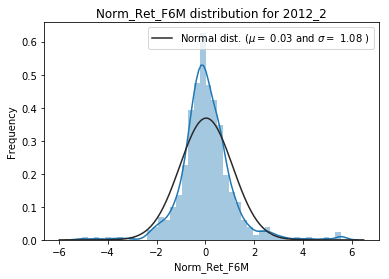

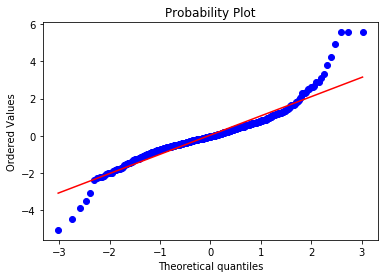


 mu = -0.02 and sigma = 1.03



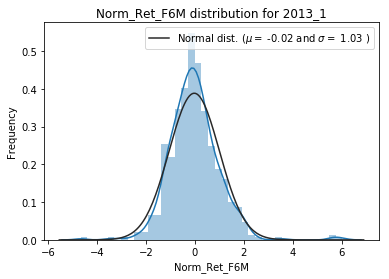

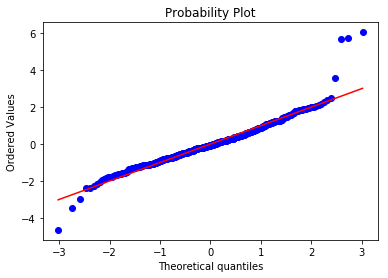


 mu = -0.00 and sigma = 0.99



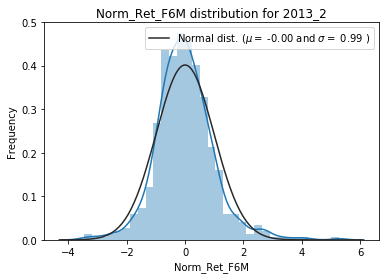

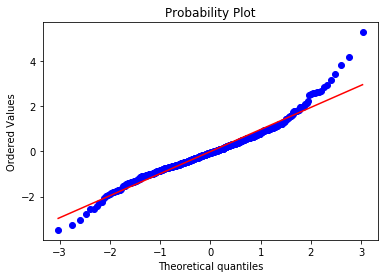


 mu = -0.01 and sigma = 1.01



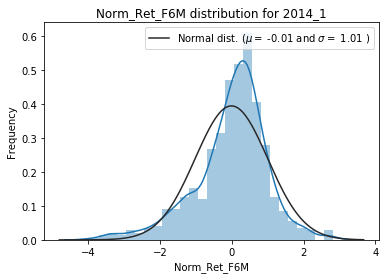

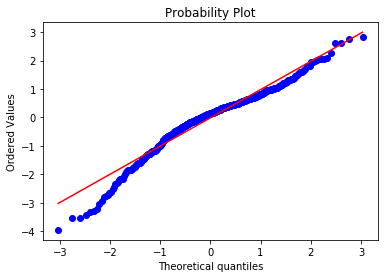


 mu = 0.05 and sigma = 0.97



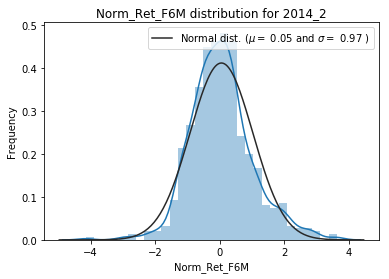

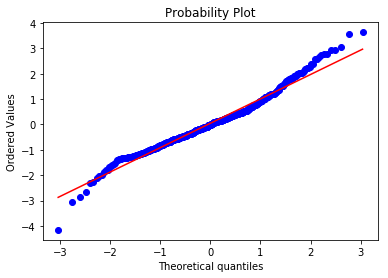


 mu = -0.06 and sigma = 1.00



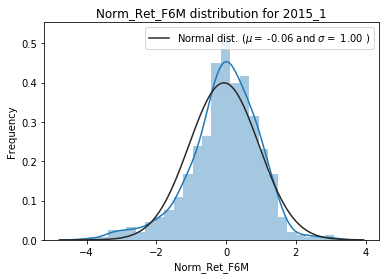

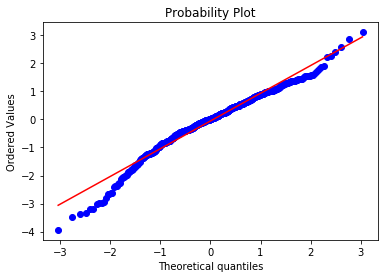


 mu = 0.03 and sigma = 1.01



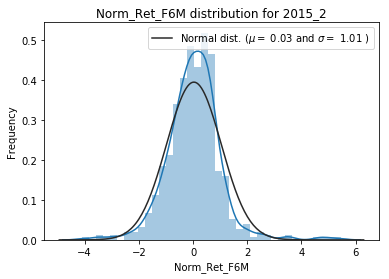

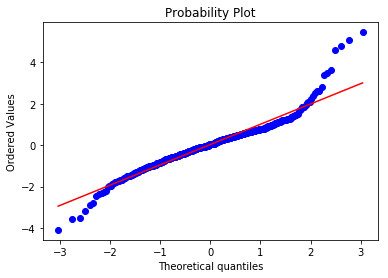


 mu = -0.00 and sigma = 1.00



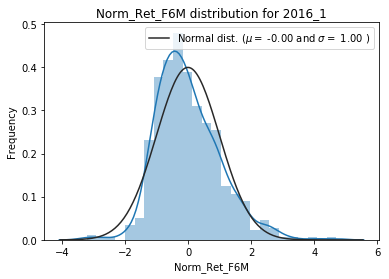

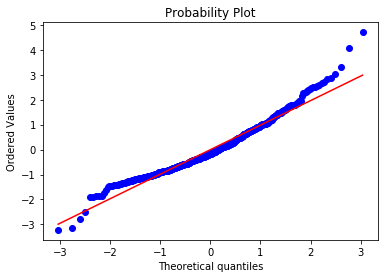


 mu = -0.03 and sigma = 0.99



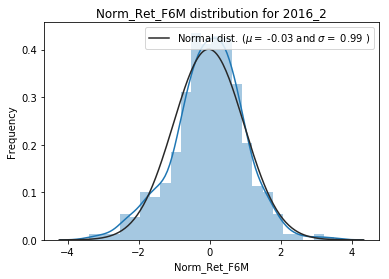

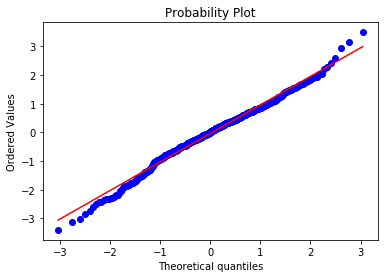

Wall time: 11.1 s


In [4]:
%%time
for time_period in DS0_class.time_periods[:-1]:
    sns.distplot(DS0_class.transformed_df.loc[(DS0_class.transformed_df['time_period']== time_period)
                                              &(DS0_class.transformed_df['Train']== 1), 'Norm_Ret_F6M'] , fit=stats.norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(DS0_class.transformed_df.loc[(DS0_class.transformed_df['time_period']== time_period)
                                              &(DS0_class.transformed_df['Train']== 1), 'Norm_Ret_F6M'])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Norm_Ret_F6M distribution for {}'.format(time_period))

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(DS0_class.transformed_df.loc[(DS0_class.transformed_df['time_period']== time_period)
                                              &(DS0_class.transformed_df['Train']== 1), 'Norm_Ret_F6M'], plot=plt)
    plt.show()

#### Visual analysis for non-informative columns and outliers

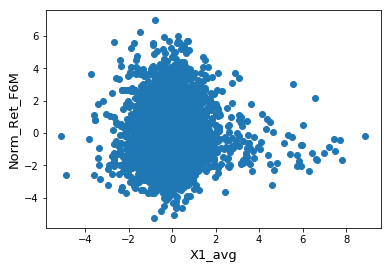

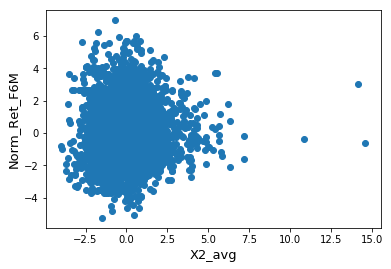

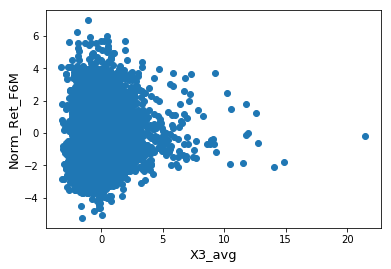

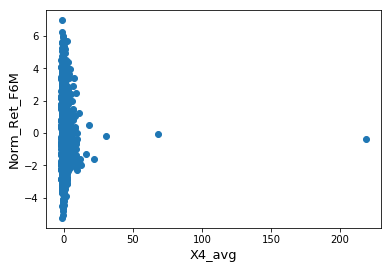

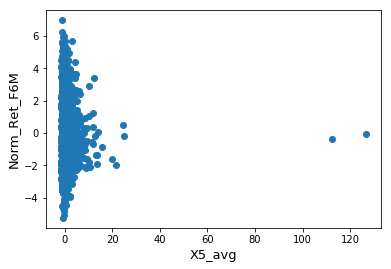

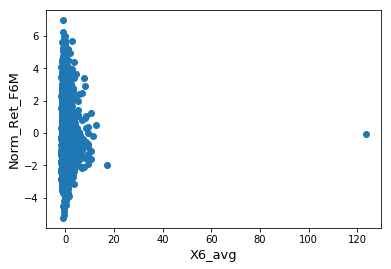

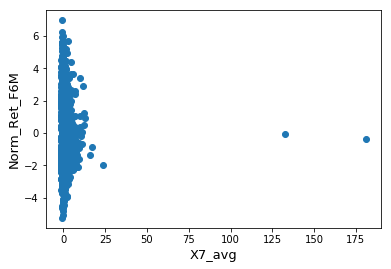

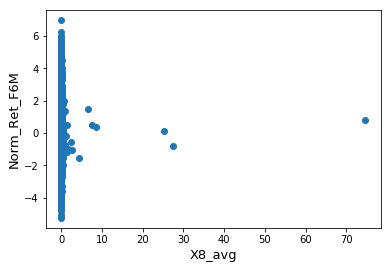

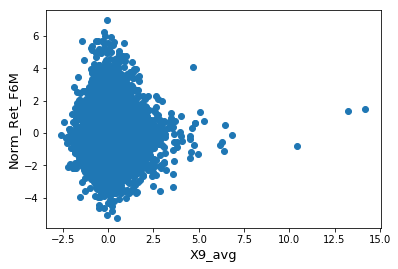

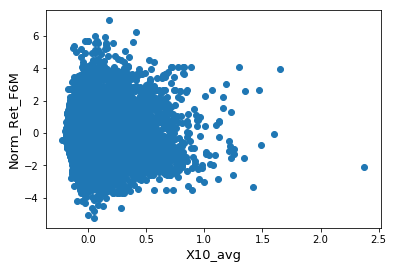

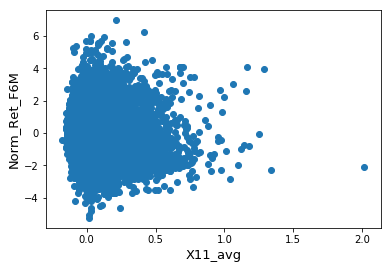

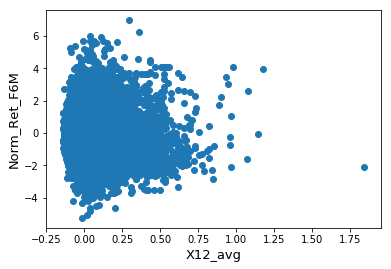

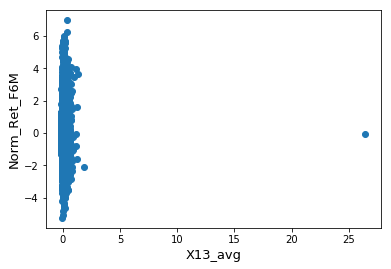

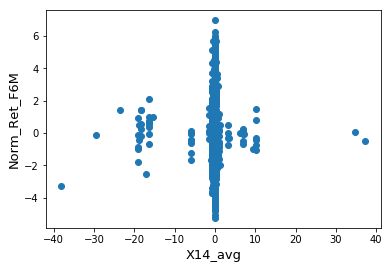

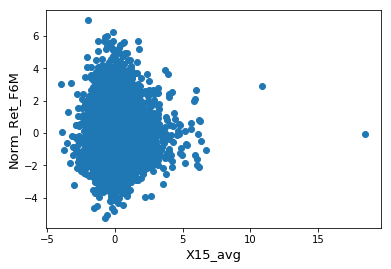

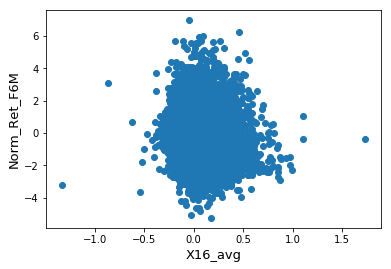

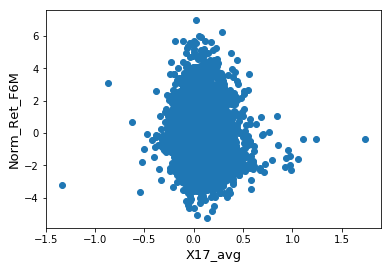

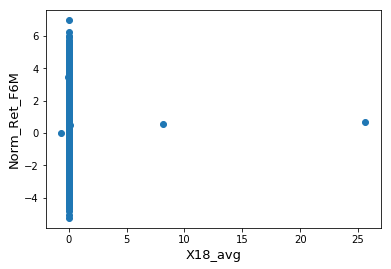

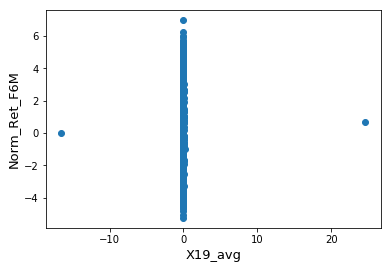

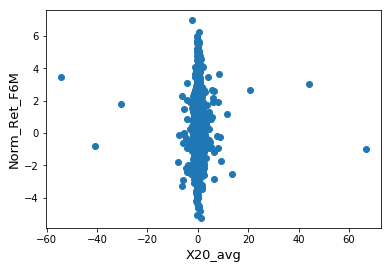

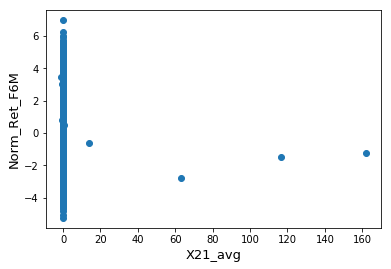

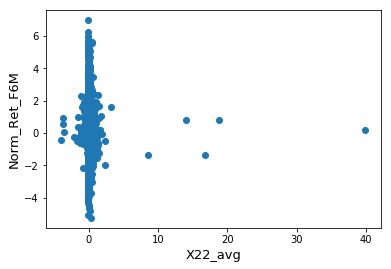

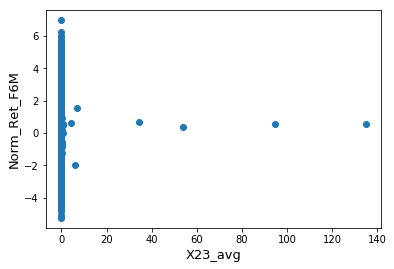

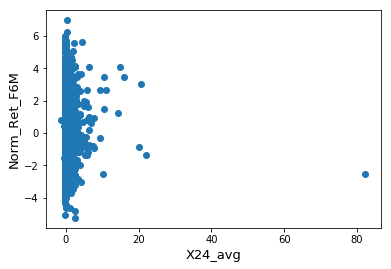

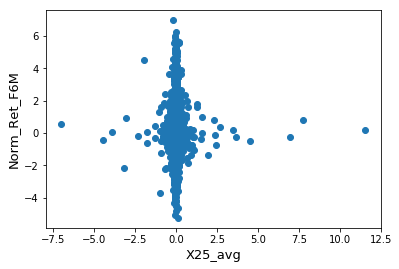

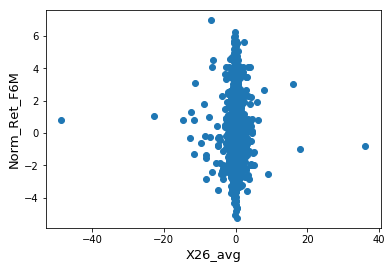

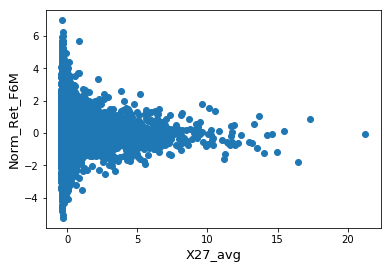

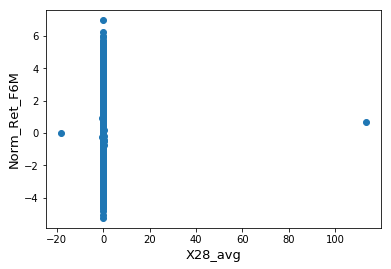

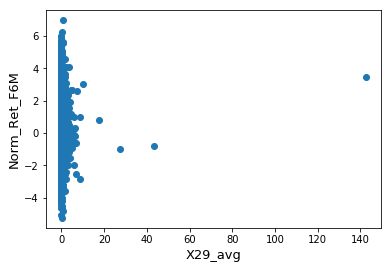

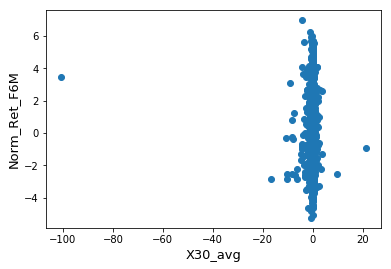

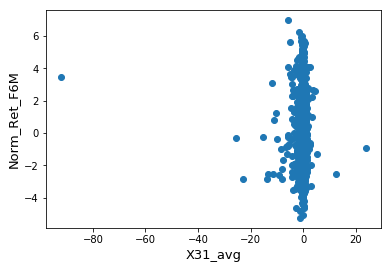

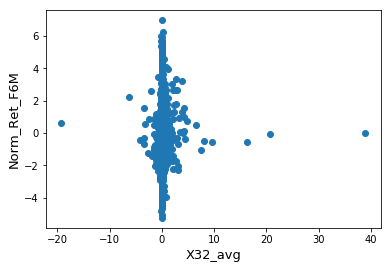

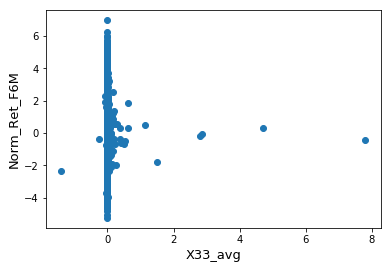

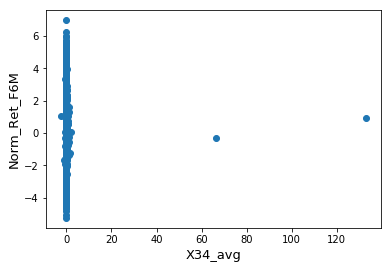

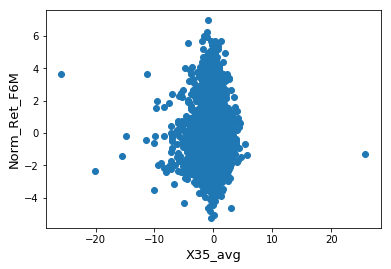

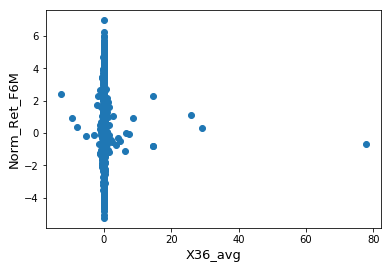

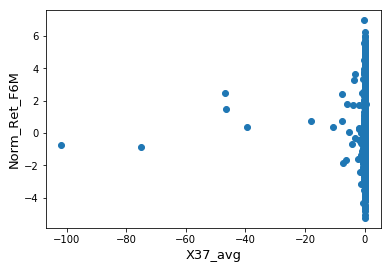

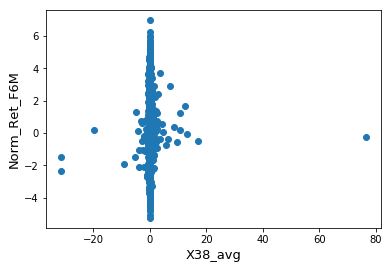

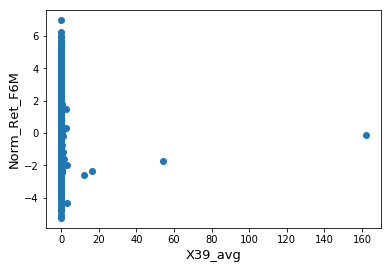

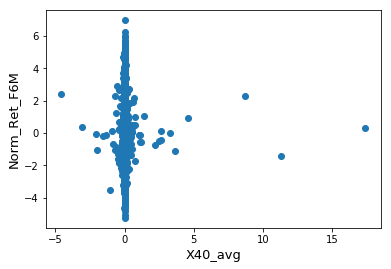

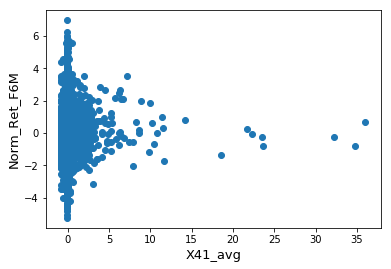

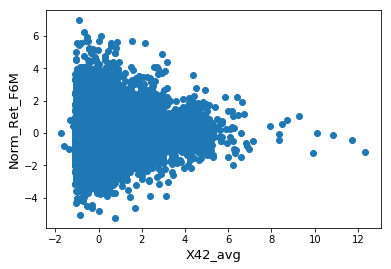

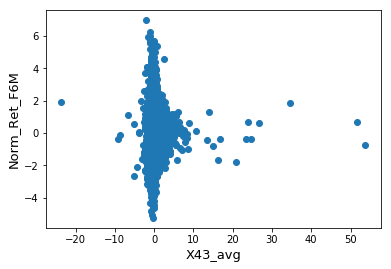

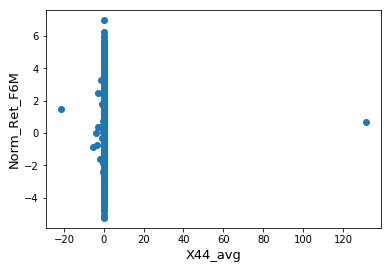

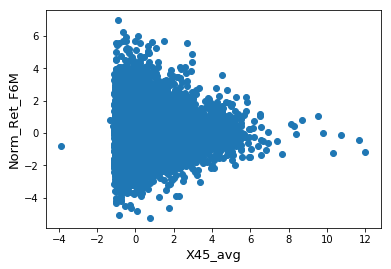

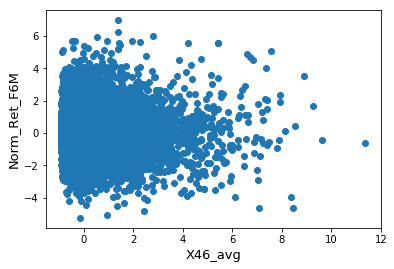

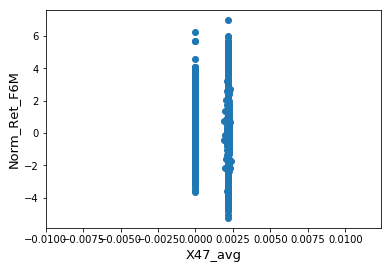

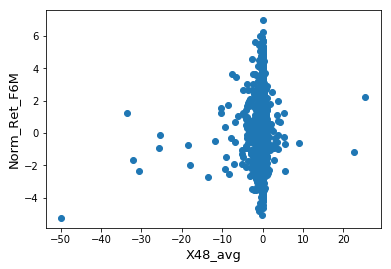

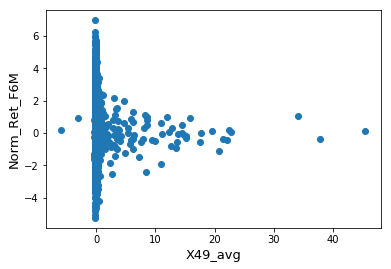

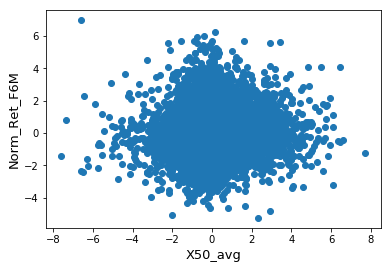

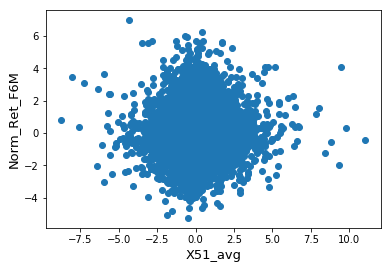

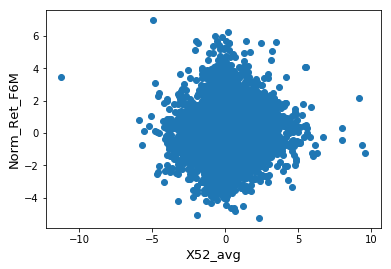

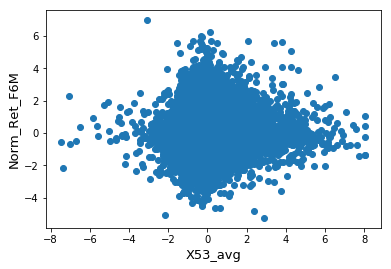

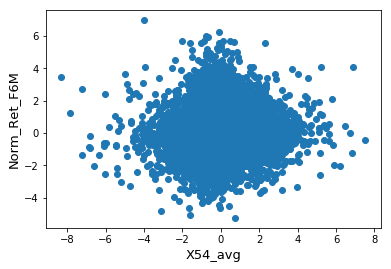

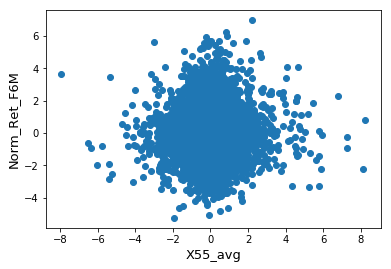

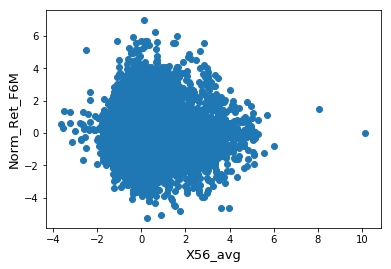

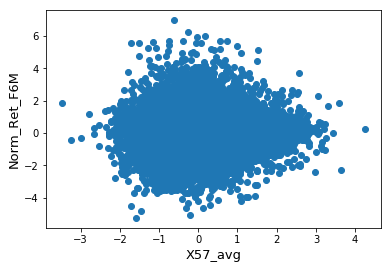

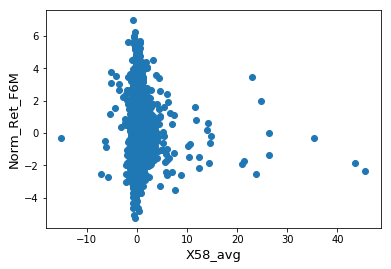

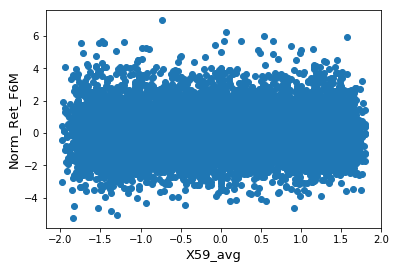

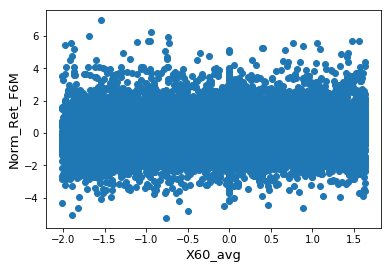

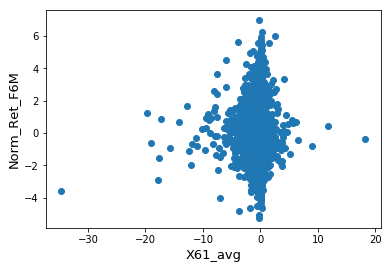

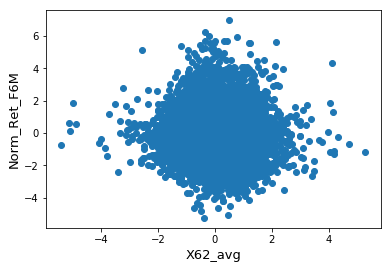

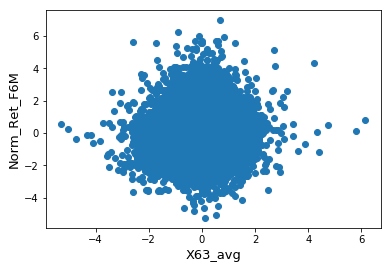

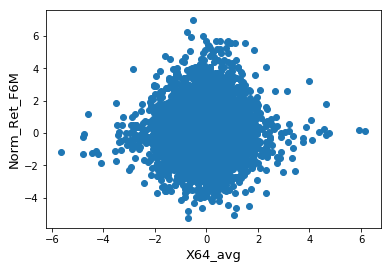

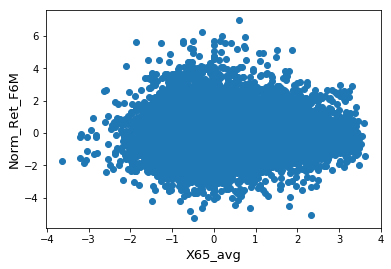

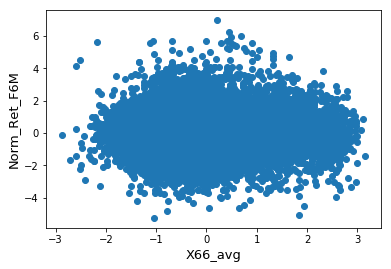

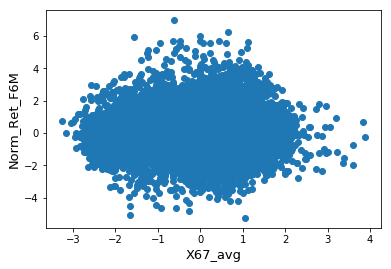

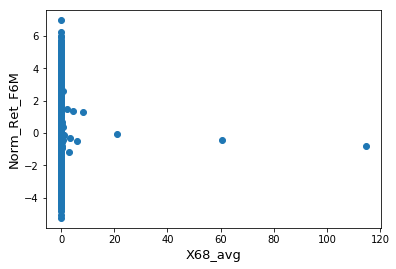

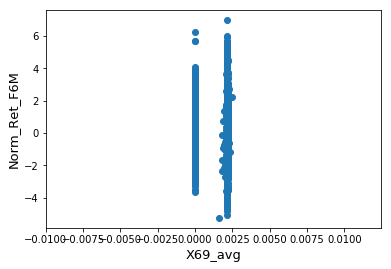

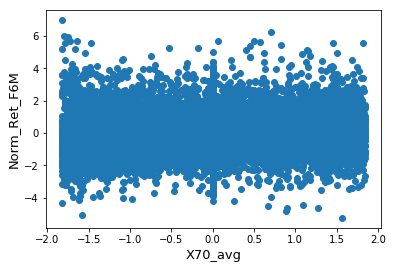

Wall time: 17.7 s


In [5]:
%%time
for col in DS0_class.transformed_df.loc[:, 'X1_avg':'X70_avg'].columns:
    fig, ax = plt.subplots()
    ax.scatter(x = DS0_class.transformed_df.loc[DS0_class.transformed_df['Train']== 1, col], 
               y = DS0_class.transformed_df.loc[DS0_class.transformed_df['Train']== 1, 'Norm_Ret_F6M'])
    plt.ylabel('Norm_Ret_F6M', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

______________

# Create the first set of predictive models (Dataset 1)

## I. Data preparation

### A. Load data

In [6]:
%%time
DS1_class = core.PrepareDataset(PATH_TO_DATA)

Wall time: 4.31 s


### B. Feature engineering

#### Collapse basic indicators to 6-month period and exclude non-informative indicators (identified during EDA)

In [7]:
%%time
cols_looks_like_constant = ['X8_avg', 'X13_avg', 'X14_avg', 'X18_avg', 'X19_avg', 'X21_avg', 'X22_avg','X23_avg', 'X24_avg',
                           'X28_avg', 'X29_avg', 'X30_avg', 'X31_avg', 'X32_avg', 'X33_avg', 'X34_avg', 'X36_avg', 'X37_avg',
                           'X38_avg', 'X39_avg', 'X40_avg', 'X44_avg', 'X47_avg', 'X68_avg', 'X69_avg', 'X48_avg', 'X49_avg']

cols_looks_like_constant_nb = [8]
cols_looks_like_constant_nb[1:] = [int(x[1:3]) for x in cols_looks_like_constant[1:]]
range_for_dataset = list(set(list(range(1,71)))-set(cols_looks_like_constant_nb))

Wall time: 0 ns


In [8]:
%%time
DS1_class.collapse_basic_indicators(indicators_range = range_for_dataset)
DS1_class.transformed_df.columns

Begin to collapse basic indicators
[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 17, 20, 25, 26, 27, 35, 41, 42, 43, 45, 46, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 70] indicators were selected
Basic indicators collapsed
Wall time: 12.4 s


#### Remove outliers

In [9]:
%%time
DS1_class.drop_outliers()

Start to drop rows with outliers. 0.0005 quantile will be removed from each side
Done. 780 rows were removed
Wall time: 159 ms


#### Generate synthetic indicators (substract one basic indicator from each other and multiply them by pairs)

In [10]:
%%time
DS1_class.generate_synthetic_indicators()

Processing column X1_avg
Processing column X2_avg
Processing column X3_avg
Processing column X4_avg
Processing column X5_avg
Processing column X6_avg
Processing column X7_avg
Processing column X9_avg
Processing column X10_avg
Processing column X11_avg
Processing column X12_avg
Processing column X15_avg
Processing column X16_avg
Processing column X17_avg
Processing column X20_avg
Processing column X25_avg
Processing column X26_avg
Processing column X27_avg
Processing column X35_avg
Processing column X41_avg
Processing column X42_avg
Processing column X43_avg
Processing column X45_avg
Processing column X46_avg
Processing column X50_avg
Processing column X51_avg
Processing column X52_avg
Processing column X53_avg
Processing column X54_avg
Processing column X55_avg
Processing column X56_avg
Processing column X57_avg
Processing column X58_avg
Processing column X59_avg
Processing column X60_avg
Processing column X61_avg
Processing column X62_avg
Processing column X63_avg
Processing column X6

#### Generate technical indicators

In [11]:
%%time
DS1_class.add_tech_indicators()
DS1_class.transformed_df.columns

Start to form basic indicators
Done
Wall time: 5.2 s


#### Scale data

In [12]:
%%time
DS1_class.scale_df()
DS1_class.transformed_scaled_df.head()

Wall time: 17.9 s


## II. Model optmization

### Massive search of optimal start training period and columns

In [13]:
%%time
RidgeDS1OptimClass = core.OptimizeRidgeHyperparameters(
    df = DS1_class.transformed_scaled_df,
    time_periods = DS1_class.time_periods,
    time_periods_index = DS1_class.time_periods_index,
    path_to_optim = PATH_TO_MODELS,
    feat_selection_filename = 'feat_selection_ridge_DS1.pickle',
    model_tune_filename = 'hp_tune_ridge_DS1.pickle')

# the step below takes 12-36 hours (depending on dataset). Due to this, it is commented by default

# RidgeDS1OptimClass.select_best_features(step=100)

# we load alredy created dataframe with the results
RidgeDS1OptimClass.load_best_features_from_file()
RidgeDS1OptimClass.get_best_features_df()

Wall time: 73.7 ms


### Hyperparameters tuning by using best features and time window

In [14]:
%%time
RidgeDS1OptimClass.select_best_hp_with_best_features()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Wall time: 6min 5s


## III Train best models and get prediction for holdout data

In [15]:
%%time
RidgeDS1BestModelClass = core.FormRidgePredictions(
    df = DS1_class.transformed_scaled_df, 
    time_periods = DS1_class.time_periods, 
    time_periods_index = DS1_class.time_periods_index, 
    best_params_dict = RidgeDS1OptimClass.get_best_model_df()
    )

Wall time: 18.7 ms


In [16]:
%%time
# train model with the best models
RidgeDS1BestModelClass.predict_ridge()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Time period 2017_1 completed.
Wall time: 44.3 s


In [17]:
%%time
# check predictors efficiency
RidgeDS1BestModelClass.valid_res

Wall time: 0 ns


,time_period,spearman,NDCG
0,2002_1,0.205355,0.187680
0,2002_2,-0.023078,-0.011813
0,2003_1,0.133660,0.199626
0,2003_2,0.211233,0.076384
0,2004_1,0.161774,0.182668
0,2004_2,0.273493,0.172692
0,2005_1,0.091169,0.144587
0,2005_2,0.036128,-0.004656
0,2006_1,0.140183,0.011196
0,2006_2,0.084335,0.120740


_______________

# Create the second set of predictive models (Dataset 2)

## I. Data preparation

### A. Load data

In [18]:
%%time
DS2_class = core.PrepareDataset(PATH_TO_DATA)

Wall time: 4.38 s


### B. Feature engineering

#### Collapse basic indicators to 6-month period

In [19]:
%%time
DS2_class.collapse_basic_indicators()
DS2_class.transformed_df.head()

Begin to collapse basic indicators
range(1, 71) indicators were selected
Basic indicators collapsed
Wall time: 22.5 s


#### Generate technical indicators

In [20]:
%%time
DS2_class.add_tech_indicators()
DS2_class.transformed_df.columns

Start to form basic indicators
Done
Wall time: 315 ms


#### Scale data

In [21]:
%%time
DS2_class.scale_df()
DS2_class.transformed_scaled_df.head()

Wall time: 798 ms


## II. Model optmization

### Massive search of optimal start training period and columns

In [22]:
%%time
RidgeDS2OptimClass = core.OptimizeRidgeHyperparameters(
    df = DS2_class.transformed_scaled_df,
    time_periods = DS2_class.time_periods,
    time_periods_index = DS2_class.time_periods_index,
    path_to_optim = PATH_TO_MODELS,
    feat_selection_filename = 'feat_selection_ridge_DS2.pickle',
    model_tune_filename = 'hp_tune_ridge_DS2.pickle')

# the step below takes 12-36 hours (depending on dataset). Due to this, it is commented by default

# RidgeDS2OptimClass.select_best_features()

# we load alredy created dataframe with the results
RidgeDS2OptimClass.load_best_features_from_file()
RidgeDS2OptimClass.get_best_features_df()

Wall time: 50.2 ms


### Hyperparameters tuning by using best features and time window

In [23]:
%%time
RidgeDS2OptimClass.select_best_hp_with_best_features()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Wall time: 1min 11s


### Extract most important columns for Dataset 3

In [24]:
%%time
most_frequent_feat_indices = RidgeDS2OptimClass.get_most_frequent_feat_indices(threshold=12)
len(most_frequent_feat_indices)

Wall time: 59.7 ms


## III Train best models and get prediction for holdout data

In [25]:
%%time
RidgeDS2BestModelClass = core.FormRidgePredictions(
    df = DS2_class.transformed_scaled_df, 
    time_periods = DS2_class.time_periods, 
    time_periods_index = DS2_class.time_periods_index, 
    best_params_dict = RidgeDS2OptimClass.get_best_model_df()
    )

Wall time: 22.1 ms


In [26]:
# train model with the best models
RidgeDS2BestModelClass.predict_ridge()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Time period 2017_1 completed.


In [27]:
%%time
# check predictors efficiency
RidgeDS2BestModelClass.valid_res

Wall time: 0 ns


,time_period,spearman,NDCG
0,2002_1,0.200391,0.105319
0,2002_2,-0.108021,-0.012867
0,2003_1,0.106636,0.145542
0,2003_2,0.241959,0.110589
0,2004_1,0.190032,0.163453
0,2004_2,0.400024,0.365512
0,2005_1,0.037240,0.079623
0,2005_2,0.102930,0.055756
0,2006_1,0.154243,0.187484
0,2006_2,0.116277,0.161734


_______________

# Create the third set of predictive models (Dataset 3)

## I. Data preparation

### A. Load data

In [28]:
%%time
DS3_class = core.PrepareDataset(PATH_TO_DATA)

Wall time: 4.23 s


### B. Feature engineering

#### Collapse basic indicators to 6-month period and use only the most frequent indicators used in the best predictors from the second set

In [29]:
%%time
DS3_class.collapse_basic_indicators(indicators_range = most_frequent_feat_indices)
DS3_class.transformed_df.head()

Begin to collapse basic indicators
[1, 2, 3, 7, 11, 16, 17, 20, 21, 24, 25, 26, 29, 31, 35, 38, 39, 40, 42, 45, 48, 58] indicators were selected
Basic indicators collapsed
Wall time: 6.23 s


#### Generate synthetic indicators (substract one basic indicator from each other , multiply them by pairs, divide and add)

In [30]:
%%time
DS3_class.generate_synthetic_indicators(types = ['substract', 'add', 'multiply', 'divide'])

Processing column X1_avg
Processing column X2_avg
Processing column X3_avg
Processing column X7_avg
Processing column X11_avg
Processing column X16_avg
Processing column X17_avg
Processing column X20_avg
Processing column X21_avg
Processing column X24_avg
Processing column X25_avg
Processing column X26_avg
Processing column X29_avg
Processing column X31_avg
Processing column X35_avg
Processing column X38_avg
Processing column X39_avg
Processing column X40_avg
Processing column X42_avg
Processing column X45_avg
Processing column X48_avg
Processing column X58_avg
Done
Wall time: 6.66 s


#### Generate technical indicators

In [31]:
%%time
DS3_class.add_tech_indicators()
DS3_class.transformed_df.columns

Start to form basic indicators
Done
Wall time: 2.74 s


#### Scale data

In [32]:
%%time
DS3_class.scale_df()
DS3_class.transformed_scaled_df.head()

Wall time: 9.61 s


## II. Model optmization

### Massive search of optimal start training period and columns

In [33]:
%%time
RidgeDS3OptimClass = core.OptimizeRidgeHyperparameters(
    df = DS3_class.transformed_scaled_df,
    time_periods = DS3_class.time_periods,
    time_periods_index = DS3_class.time_periods_index,
    path_to_optim = PATH_TO_MODELS,
    feat_selection_filename = 'feat_selection_ridge_DS3.pickle',
    model_tune_filename = 'hp_tune_ridge_DS3.pickle')

# the step below takes 12-36 hours (depending on dataset). Due to this, it is commented by default

# RidgeDS3OptimClass.select_best_features(step=100)

# we load alredy created dataframe with the results
RidgeDS3OptimClass.load_best_features_from_file()
RidgeDS3OptimClass.get_best_features_df()

Wall time: 31 ms


### Hyperparameters tuning by using best features and time window

In [34]:
%%time
RidgeDS3OptimClass.select_best_hp_with_best_features()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Wall time: 3min 3s


## III Train best models and get prediction for holdout data

In [35]:
%%time
RidgeDS3BestModelClass = core.FormRidgePredictions(
    df = DS3_class.transformed_scaled_df, 
    time_periods = DS3_class.time_periods, 
    time_periods_index = DS3_class.time_periods_index, 
    best_params_dict = RidgeDS3OptimClass.get_best_model_df()
    )

Wall time: 20 ms


In [36]:
%%time
# train model with the best models
RidgeDS3BestModelClass.predict_ridge()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Time period 2017_1 completed.
Wall time: 17.1 s


In [37]:
%%time
# check predictors efficiency
RidgeDS3BestModelClass.valid_res

Wall time: 0 ns


,time_period,spearman,NDCG
0,2002_1,0.204489,0.143765
0,2002_2,-0.170858,-0.045660
0,2003_1,0.085967,0.150906
0,2003_2,0.245789,0.187738
0,2004_1,0.209150,0.140521
0,2004_2,0.380369,0.348566
0,2005_1,0.053599,0.026623
0,2005_2,0.152235,0.040399
0,2006_1,0.148227,0.047611
0,2006_2,0.171430,0.164130


_______________

# Create the fourth set of predictive models (Dataset 4)

## I. Data preparation

## A. Load data

In [38]:
%%time
DS4_class = core.PrepareDataset(PATH_TO_DATA)

Wall time: 4.31 s


### B. Feature engineering

#### Collapse basic indicators to 6-month period and use only the most frequent indicators used in the best predictors from the second set

In [39]:
%%time
DS4_class.collapse_basic_indicators()
DS4_class.transformed_df.head()

Begin to collapse basic indicators
range(1, 71) indicators were selected
Basic indicators collapsed
Wall time: 22.3 s


#### Generate synthetic indicators (substract one basic indicator from each other , multiply them by pairs, divide and add)

In [40]:
%%time
DS4_class.generate_synthetic_indicators(types = ['substract', 'add', 'multiply', 'divide'])

Processing column X1_avg
Processing column X2_avg
Processing column X3_avg
Processing column X4_avg
Processing column X5_avg
Processing column X6_avg
Processing column X7_avg
Processing column X8_avg
Processing column X9_avg
Processing column X10_avg
Processing column X11_avg
Processing column X12_avg
Processing column X13_avg
Processing column X14_avg
Processing column X15_avg
Processing column X16_avg
Processing column X17_avg
Processing column X18_avg
Processing column X19_avg
Processing column X20_avg
Processing column X21_avg
Processing column X22_avg
Processing column X23_avg
Processing column X24_avg
Processing column X25_avg
Processing column X26_avg
Processing column X27_avg
Processing column X28_avg
Processing column X29_avg
Processing column X30_avg
Processing column X31_avg
Processing column X32_avg
Processing column X33_avg
Processing column X34_avg
Processing column X35_avg
Processing column X36_avg
Processing column X37_avg
Processing column X38_avg
Processing column X39

#### Scale data

In [41]:
%%time
DS4_class.scale_df()
DS4_class.transformed_scaled_df.head()

Wall time: 4min 51s


#### Generate new features based on PCA that explains 99% of variability

In [42]:
%%time
DS4_class.apply_pca_to_scaled_df(n_components=0.99)

Wall time: 52min 53s


In [43]:
DS4_class.transformed_scaled_df.head()

,time_period,index,Train,Norm_Ret_F6M,Rank_F6M,pca_1,pca_2,pca_3,pca_4,pca_5,...,pca_343,pca_344,pca_345,pca_346,pca_347,pca_348,pca_349,pca_350,pca_351,pca_352
0,1996_2,1996_2_lo2py80q,1,-0.164343,563.0,-0.443200,-0.717530,-0.556406,-0.809859,-0.767926,...,0.005399,-0.003728,0.005385,0.006004,0.021685,0.000055,-0.008778,0.008937,-0.013033,0.005291
1,1996_2,1996_2_c0lbkx5l,1,0.159314,402.0,1.510946,-1.267613,-0.938207,1.016919,0.911169,...,-0.020007,0.000029,-0.022248,0.019070,-0.015735,-0.030649,-0.004265,-0.009192,-0.009354,-0.021894
2,1996_2,1996_2_awxeoifz,1,0.931337,131.0,2.726491,-1.946628,0.260920,0.669379,-0.270412,...,0.013954,0.040615,-0.063571,0.009503,-0.038710,-0.020828,-0.048957,0.016792,0.016109,-0.041019
3,1996_2,1996_2_4s31wr2v,1,0.520933,254.0,1.793031,-2.080621,0.478144,2.176655,-1.243041,...,-0.008323,-0.006360,0.005903,0.003679,-0.015811,-0.004287,-0.014528,0.005367,0.005289,0.014110
4,1996_2,1996_2_d70vvuvm,1,-0.750410,772.0,1.981829,-1.186055,1.148262,1.451468,0.088498,...,-0.038881,0.000551,0.032138,-0.009753,-0.064695,0.028056,-0.045958,-0.003828,0.037680,-0.033598


## II. Model optmization

### Massive search of optimal start training period and columns

In [45]:
%%time
RidgeDS4OptimClass = core.OptimizeRidgeHyperparameters(
    df = DS4_class.transformed_scaled_df,
    time_periods = DS4_class.time_periods,
    time_periods_index = DS4_class.time_periods_index,
    path_to_optim = PATH_TO_MODELS,
    feat_selection_filename = 'feat_selection_ridge_DS4.pickle',
    model_tune_filename = 'hp_tune_ridge_DS4.pickle')

# the step below takes 12-36 hours (depending on dataset). Due to this, it is commented by default

# RidgeDS4OptimClass.select_best_features(step=5)

# we load alredy created dataframe with the results
RidgeDS4OptimClass.load_best_features_from_file()
RidgeDS4OptimClass.get_best_features_df()

Wall time: 797 ms


### Hyperparameters tuning by using best features and time window

In [46]:
%%time
RidgeDS4OptimClass.select_best_hp_with_best_features()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Wall time: 1min 31s


## III Train best models and get prediction for holdout data

In [47]:
%%time
RidgeDS4BestModelClass = core.FormRidgePredictions(
    df = DS4_class.transformed_scaled_df, 
    time_periods = DS4_class.time_periods, 
    time_periods_index = DS4_class.time_periods_index, 
    best_params_dict = RidgeDS4OptimClass.get_best_model_df()
    )

Wall time: 21.6 ms


In [48]:
%%time
# train model with the best models
RidgeDS4BestModelClass.predict_ridge()

Time period 2002_1 completed.
Time period 2002_2 completed.
Time period 2003_1 completed.
Time period 2003_2 completed.
Time period 2004_1 completed.
Time period 2004_2 completed.
Time period 2005_1 completed.
Time period 2005_2 completed.
Time period 2006_1 completed.
Time period 2006_2 completed.
Time period 2007_1 completed.
Time period 2007_2 completed.
Time period 2008_1 completed.
Time period 2008_2 completed.
Time period 2009_1 completed.
Time period 2009_2 completed.
Time period 2010_1 completed.
Time period 2010_2 completed.
Time period 2011_1 completed.
Time period 2011_2 completed.
Time period 2012_1 completed.
Time period 2012_2 completed.
Time period 2013_1 completed.
Time period 2013_2 completed.
Time period 2014_1 completed.
Time period 2014_2 completed.
Time period 2015_1 completed.
Time period 2015_2 completed.
Time period 2016_1 completed.
Time period 2016_2 completed.
Time period 2017_1 completed.
Wall time: 8.54 s


In [49]:
%%time
# check predictors efficiency
RidgeDS4BestModelClass.valid_res

Wall time: 0 ns


,time_period,spearman,NDCG
0,2002_1,0.180463,0.155173
0,2002_2,0.113644,0.265377
0,2003_1,0.111205,0.041639
0,2003_2,0.150437,0.053053
0,2004_1,0.104129,0.086545
0,2004_2,0.235762,0.230724
0,2005_1,0.120207,0.127267
0,2005_2,0.115544,0.035023
0,2006_1,0.112314,0.031154
0,2006_2,0.141824,0.176873


_______________
_______________

# Select the best predictor for each time period and submit the file

## Find the best predictor for each period based on validation score results

In [52]:
%%time
ModelEnsemble = core.PrepareSubmitFile(
    model_list = [RidgeDS1BestModelClass, RidgeDS2BestModelClass, RidgeDS3BestModelClass, RidgeDS4BestModelClass],
    path_to_data = PATH_TO_DATA,
    path_to_results = PATH_TO_RESULTS    
)
ModelEnsemble.select_predictor_for_each_period()

Wall time: 231 ms


In [53]:
# check predictors validation score
ModelEnsemble.best_predictors_df[:-1]

,time_period,best_value,best_model_index
0,2002_1,0.196517,0
1,2002_2,0.189511,3
2,2003_1,0.166643,0
3,2003_2,0.216764,2
4,2004_1,0.176743,1
5,2004_2,0.382768,1
6,2005_1,0.123737,3
7,2005_2,0.096317,2
8,2006_1,0.170863,1
9,2006_2,0.167780,2


In [54]:
ModelEnsemble.best_predictors_df[:-1]['best_value'].mean()

0.226653837373898

## Form file for submission

In [55]:
%%time
ModelEnsemble.form_file()

Wall time: 179 ms


In [56]:
ModelEnsemble.submit_results()

CrowdAI.Event.Authentication : Authenticating for challenge = IEEEInvestmentRankingChallenge
CrowdAI.Event.Connection.CONNECTED
CrowdAI.Event.Authentication.SUCCESS : Authentication Successful
CrowdAI.Event.Misc : Making submission for Round 2
CrowdAI.Event.Misc.FILE_UPLOAD : Preparing for file upload
CrowdAI.Event.Misc.FILE_UPLOAD : Uploading file


100% |██████████|[00:00<00:00]  179.19% /s] 


CrowdAI.Event.Job.ENQUEUED : ee227a0b-09a0-4271-b922-6208146eca73


CrowdAI.Event.Job.RUNNING : ee227a0b-09a0-4271-b922-6208146eca73


CrowdAI.Event.Job.INFO : (ee227a0b-09a0-4271-b922-6208146eca73) Grading Submission....


CrowdAI.Event.Job.INFO : (ee227a0b-09a0-4271-b922-6208146eca73) Scores Submitted Successfully ! Please remember to upload your code and a description of your approach (as a short paper) to https://gitlab.crowdai.org , as a private repository, tto be eligible for the final round-2 rankings.


CrowdAI.Event.Job.COMPLETE : ee227a0b-09a0-4271-b922-6208146eca73	   🍺 


ee227a0b-09a0-4271-b922-6208146eca73: 100% |██████████|[00:02<00:00]  40.83% /s] 


{'grading_message': 'graded successfully', 'grading_status': 'graded', 'api_key': '8229d44990cdd9496c4ae53cc9308aed', 'challenge_client_name': 'IEEEInvestmentRankingChallenge', 'message': ''}
